# Student's Percentage Prediction Model

## TASK 1

- To Explore Supervised Machine Learning

- In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
- This is a simple linear regression task as it involves just two variables. Data can be found at http://bit.ly/w-data

- What will be predicted score if a student study for 9.25 hrs in a day?

In [1]:
# Importing The Necessary Libraries 

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
#Import the data
url="http://bit.ly/w-data"
data=pd.read_csv(url)
df=data
print("The data is imported successfully")
df

The data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#checking for null data 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
#Let's look at the shape of the data 

df.shape

(25, 2)

In [5]:
#information about out data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#statical deatils of our data 

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


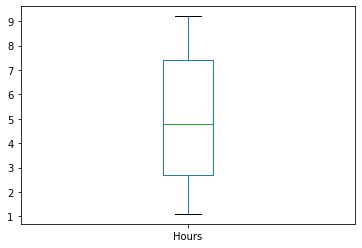

In [7]:
#checking for outliers 
df['Hours'].plot.box()

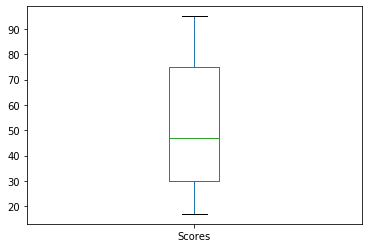

In [8]:
#checking for outliers
df['Scores'].plot.box()

# DATA VISUALIZATION

- Let's visualize our data and draw meaning full insights




In [9]:
import seaborn as sns

In [10]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 11 Text yticklabel objects>)

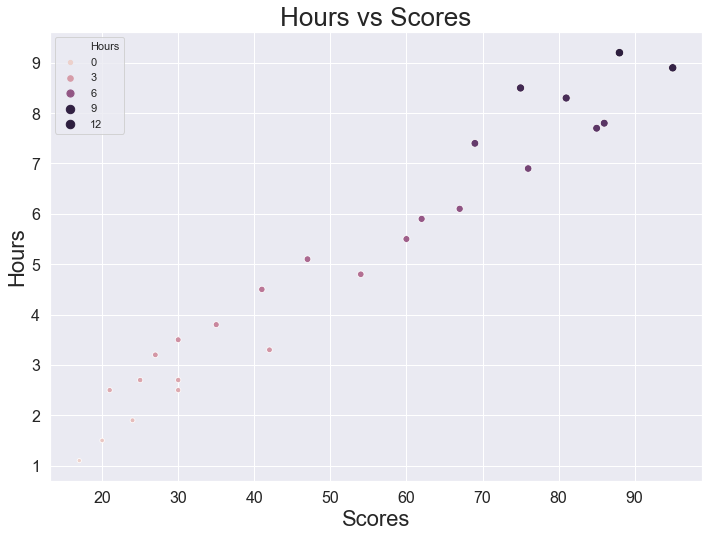

In [11]:
sns.scatterplot(y="Hours",x="Scores", data = df,marker='o',size='Hours',hue="Hours",s=100)
plt.ylabel("Hours", size=22)
plt.xlabel("Scores", size=22)
plt.title("Hours vs Scores", size=26)
plt.xticks(size=16)
plt.yticks(size=16)


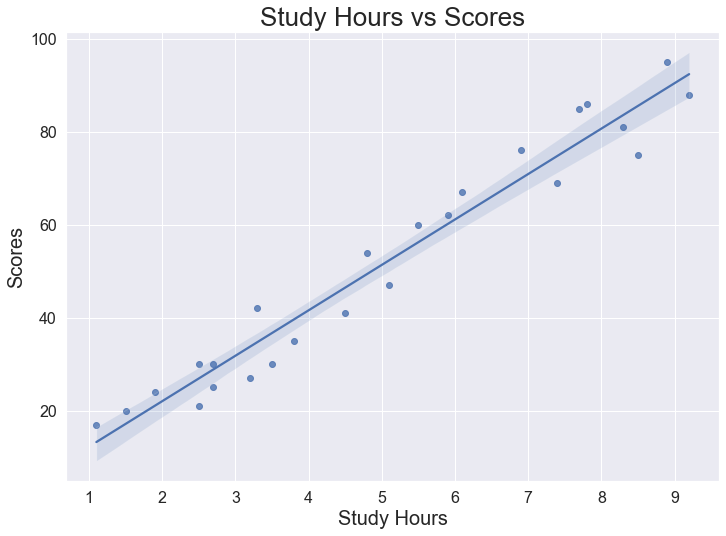

In [12]:
#plotting regressor plot to determine the relationship between feature and target
sns.regplot('Hours','Scores',data=df)
plt.title('Study Hours vs Scores',size=26)
plt.xlabel('Study Hours',size=20)
plt.ylabel('Scores',size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

- From the graph above, it can be clearly seen that there is a positive linear relation between the number of hours studied and percentage of score.

# Training The Model

- First we'll prepare our data for train_test_split
- We train our model on train data and make predictions on test data



In [13]:
#first let's split the data into train and test data 

X=df.iloc[:,:-1].values
y=df.iloc[:,1].values
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=.80,test_size=0.20,random_state=42)

In [14]:
#importing LinearRegression from sklearn 

from sklearn.linear_model import LinearRegression

In [15]:
#initialize linear reg 

linearRegressor= LinearRegression()

In [16]:
#fit the linear reg model
linearRegressor.fit(X_train, y_train)

LinearRegression()

# Plotting The Regression Line

- Here i'll be using both the regplot which does the computation and gives a beautiful plot
    and other by calculating the line manually
    

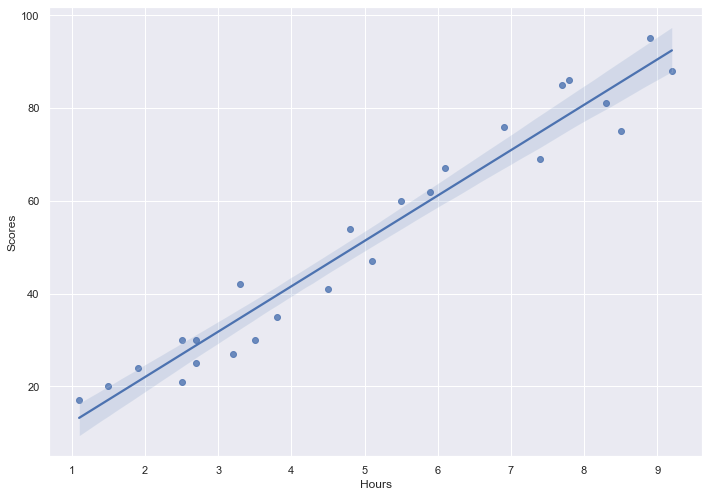

In [17]:
# Plotting the regression line using regplot 
sns.regplot(x="Hours", y="Scores", data=df)


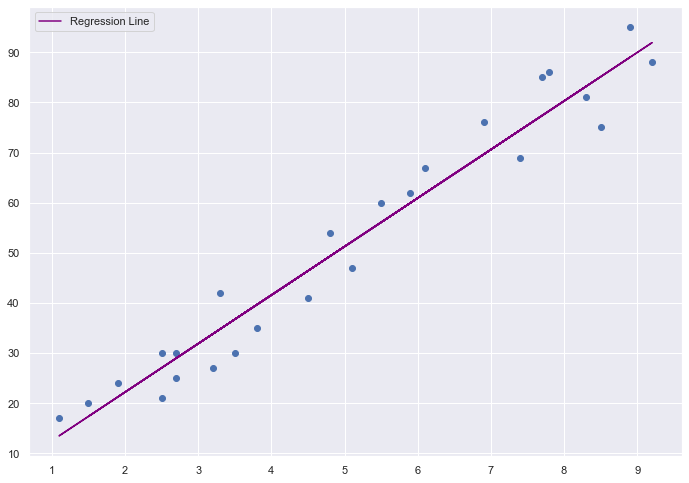

In [18]:
# Plotting the regression line
line = linearRegressor.coef_*X + linearRegressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='purple', label='Regression Line')
plt.legend()
plt.show()

# Model Prediction

- Now that we have trained our algorithm, let's do some prediction's

In [19]:
#predicting on test data 

y_predict= linearRegressor.predict(X_test)

In [20]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_predict})


In [21]:
#score our model 

print('Training Score: \n')
print(linearRegressor.score(X_train, y_train))
print('Test Score: ')
print(linearRegressor.score(X_test, y_test))


Training Score: 

0.9491209376364416
Test Score: 
0.9678055545167994


In [22]:
#Let's predict the score for 9.25 hours

hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = linearRegressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
#print('Score of student who studied for 9.25 hours a day', linearRegressor.predict([[9.25]]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


# Evaluating the model

- We need  to evaluate the performance of algorithm. This step is particularly important as we come to know how well different algorithms perform on particular dataset.

In [23]:
from sklearn import metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_predict)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R-2:', metrics.r2_score(y_test, y_predict))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


- R-squared gives the goodness of the fit and as can be seen it is 96.7% which is really good. This means that the algorithm has proven to be good for the given data.

- It can also be said that the model's accuracy is 96.78%